In [21]:
import os
from keras.models import Sequential, load_model
#from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils, plot_model ,to_categorical
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.layers import *
from keras.callbacks import *
import keras
from sklearn.preprocessing import *

In [22]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)


In [23]:
(A_train, B_train), (C_test, Y_test) = mnist.load_data()
#x_train = X_train.reshape(60000, 1, 28, 28)/255
#x_test = X_test.reshape(10000, 1, 28, 28)/255
#y_train = np_utils.to_categorical(Y_train)
#y_test = np_utils.to_categorical(Y_test)


data_1 = pd.read_csv(r'./mnist_train.csv')
X_train = data_1.drop(['label','id'],axis=1).values
Y_train = data_1['label'].values

data_3 = pd.read_csv(r'./mnist_test.csv')
X_test = data_3.drop(['id'],axis=1).values
test=data_3['id']

x_train = X_train.reshape(60000, 1, 28, 28)
x_test = X_test.reshape(10000, 1, 28, 28)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [24]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)
(60000, 1, 28, 28)
(60000, 10)
(10000, 1, 28, 28)
(10000, 10)


In [25]:
# Model Structure
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, input_shape=(1, 28, 28), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2, data_format='channels_first'))
model.add(Flatten())
model.add(Dense(256,  kernel_initializer='normal', activation='relu'))
model.add(Dense(256, input_dim=256,  kernel_initializer='normal',activation='relu'))
model.add(Dense(128, input_dim=256,  kernel_initializer='normal',activation='relu'))
model.add(Dense(32, input_dim=128,  kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1, 28, 32)         8096      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 14, 16)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               57600     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 32)               

In [26]:
# Train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=32,verbose=1)
# Test
loss, accuracy = model.evaluate(x_test, y_test)
print('Test:')
print('Loss: %s\nAccuracy: %s' % (loss, accuracy))

Epoch 1/50


InvalidArgumentError:  Default MaxPoolingOp only supports NHWC on device type CPU
	 [[node sequential_4/max_pooling2d_4/MaxPool (defined at <ipython-input-26-31bda604bd76>:3) ]] [Op:__inference_train_function_3753]

Function call stack:
train_function


In [ ]:
Z_test = X_test.reshape(10000, 28, 28)/255
# Save model
model.save('./CNN_Mnist.h5')

# Load Model
model = load_model('./CNN_Mnist.h5')

# Display
def plot_img(n):
    plt.imshow(X_test[n], cmap='gray')
    plt.show()

def all_img_predict(model):
    print(model.summary())
    loss, accuracy = model.evaluate(x_test, y_test)
    print('Loss:', loss)
    print('Accuracy:', accuracy)
    predict = model.predict_classes(x_test)
    print(pd.crosstab(Y_test.reshape(-1), predict, rownames=['Label'], colnames=['predict']))

def one_img_predict(model, n):
    predict = model.predict_classes(x_test)
    print(' 圖片:')
    plt.axis("off")
    plot_img(n)
    print(' 預測數字:', predict[n])
    print(' 答案數字:', Y_test[n])

In [ ]:
print("預測機率:",model.predict(x_test))
print("預測答案:",np.argmax(model.predict(x_test),axis=-1))

預測機率: [[1.5883301e-20 1.8386632e-05 2.9893568e-10 ... 9.9996293e-01
  3.8039840e-08 1.8701185e-05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  6.2194019e-32 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.2131654e-31 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 3.8682168e-17]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.7945410e-25 0.0000000e+00]
 [3.0607250e-02 4.3735439e-03 8.4890626e-02 ... 5.2403580e-02
  8.3094435e-03 1.1354175e-02]]
預測答案: [7 2 1 ... 4 5 6]


In [ ]:
pre=model.predict_classes(x_test)
confusion_matrix(Y_test,pre)

array([[ 972,    1,    1,    0,    0,    1,    2,    1,    2,    0],
       [   0, 1130,    1,    1,    0,    1,    2,    0,    0,    0],
       [   3,    1, 1002,    1,    0,    0,    0,    3,   22,    0],
       [   0,    0,    3,  986,    0,    6,    0,    0,   15,    0],
       [   2,    0,    0,    0,  965,    0,    1,    0,    2,   12],
       [   1,    1,    0,    8,    0,  866,    4,    0,   12,    0],
       [   2,    2,    0,    0,    2,    1,  943,    0,    8,    0],
       [   2,    3,    4,    0,    0,    0,    1, 1004,   10,    4],
       [   1,    0,    1,    1,    1,    0,    3,    0,  962,    5],
       [   1,    2,    0,    0,    7,    2,    0,    1,   11,  985]])

In [ ]:
pd.DataFrame(confusion_matrix(Y_test,pre))

,0,1,2,3,4,5,6,7,8,9
0,972,1,1,0,0,1,2,1,2,0
1,0,1130,1,1,0,1,2,0,0,0
2,3,1,1002,1,0,0,0,3,22,0
3,0,0,3,986,0,6,0,0,15,0
4,2,0,0,0,965,0,1,0,2,12
5,1,1,0,8,0,866,4,0,12,0
6,2,2,0,0,2,1,943,0,8,0
7,2,3,4,0,0,0,1,1004,10,4
8,1,0,1,1,1,0,3,0,962,5
9,1,2,0,0,7,2,0,1,11,985


In [ ]:
#x_train = X_train.reshape(60000, 1, 28, 28)/255
#x_test = X_test.reshape(10000, 1, 28, 28)/255
#y_train = np_utils.to_categorical(Y_train)
#y_test = np_utils.to_categorical(Y_test)

false_index= np.nonzero(pre != Y_test)[0]
print("預測錯誤:",len(false_index))

預測錯誤: 185


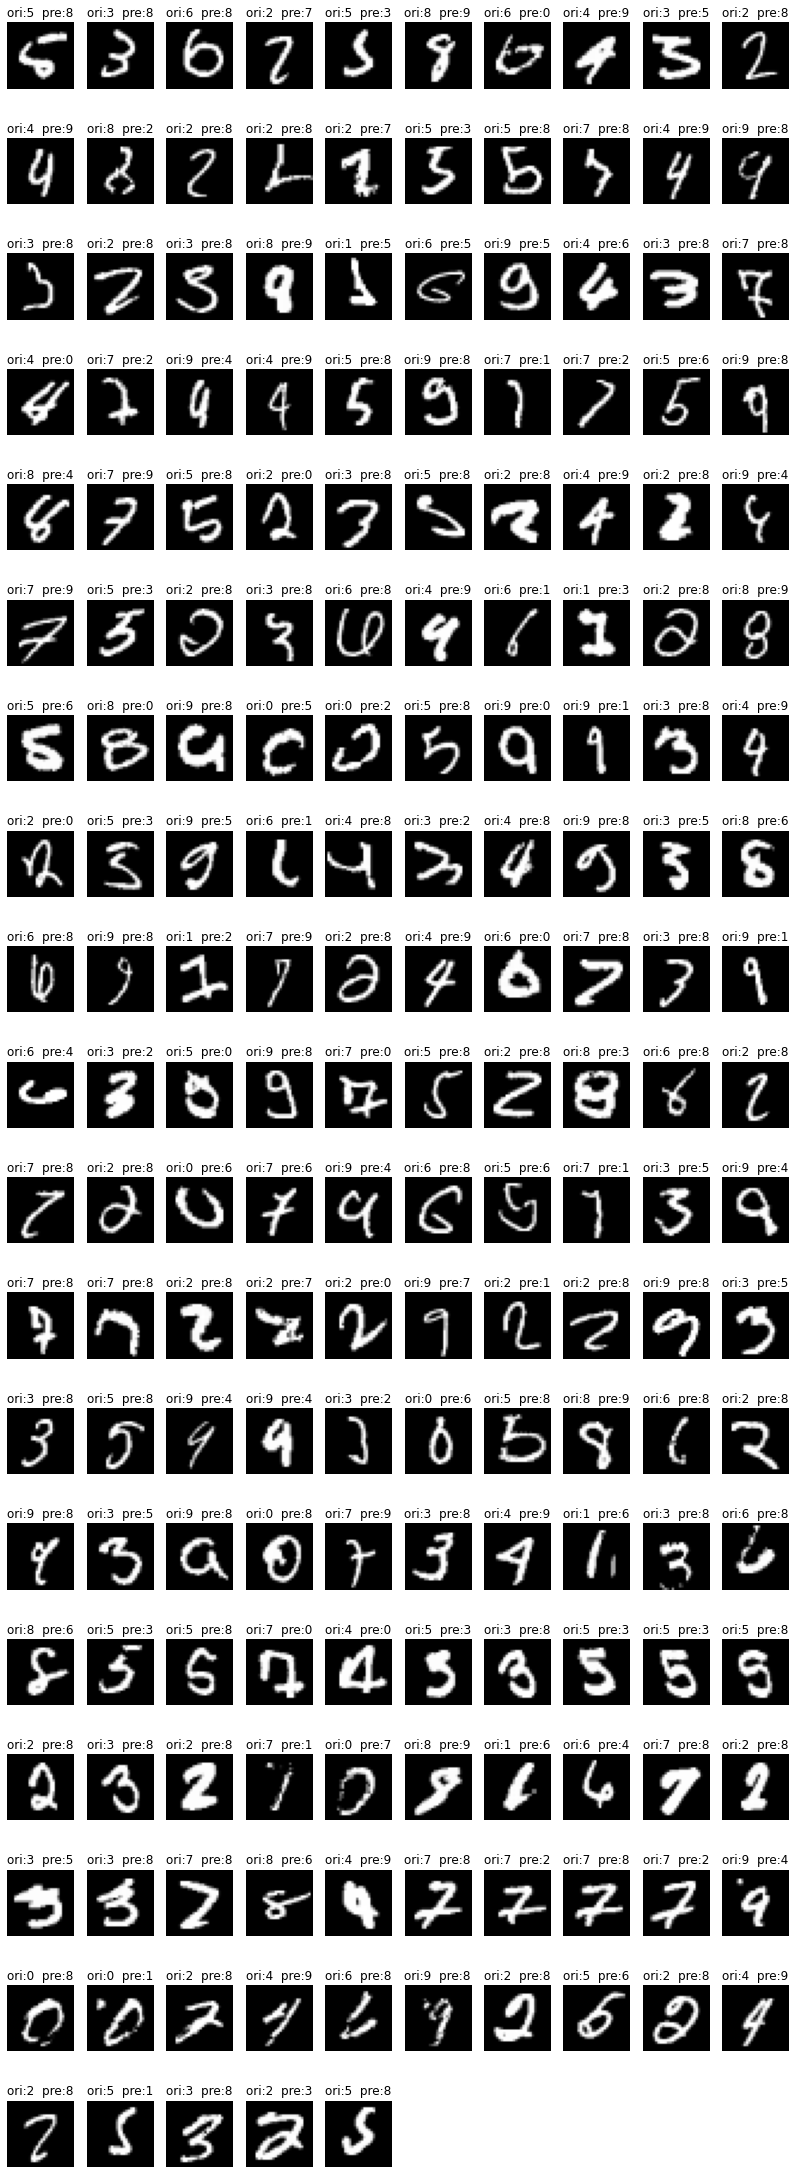

In [ ]:
#x_train = X_train.reshape(60000, 1, 28, 28)/255
#x_test = X_test.reshape(10000, 1, 28, 28)/255
#y_train = np_utils.to_categorical(Y_train)
#y_test = np_utils.to_categorical(Y_test)

false_img= Z_test[false_index]
ori_label= Y_test[false_index]
pre_label= pre[false_index]

width=10
height=int(len(false_index)/10) +1
plt.figure(figsize=(14,40))
for (index,img) in enumerate(false_img):
    plt.subplot(height,width,index + 1)
    msg="ori:"+str(ori_label[index])+"  "+"pre:"+str(pre_label[index])
    plt.title(msg)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [ ]:
prediction = pd.DataFrame(pre, columns=['label'])
result = pd.concat([test,prediction], axis=1)
result.columns
result.to_csv('/content/drive/My Drive/Colab Notebooks/MLHW2 planB/output.csv', index=False)


In [4]:
!jupyter nbconvert --to script CNN.ipynb

[NbConvertApp] Converting notebook CNN.ipynb to script
[NbConvertApp] Writing 4960 bytes to CNN.py
